<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/CEREBRINOCS/FireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.codemade.io/fire-detection-with-computer-vision/

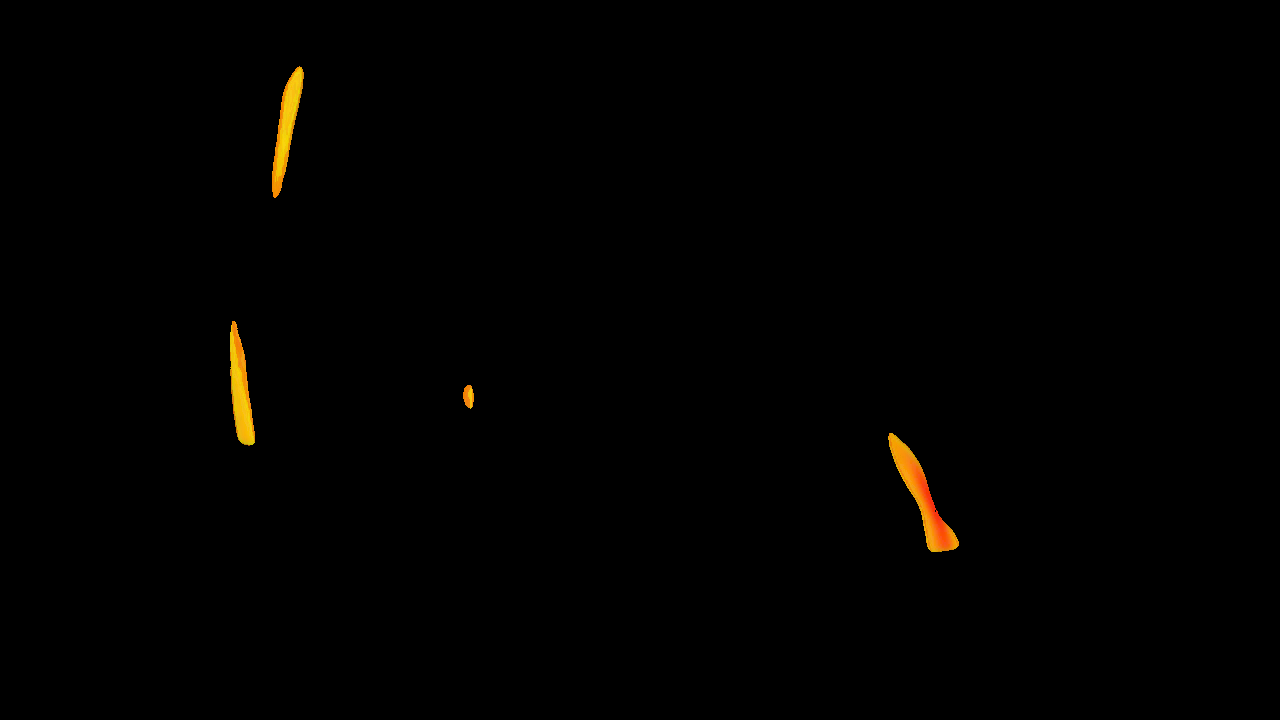

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
 
video_file = "/content/drive/My Drive/FireDetection/datasets/Fire_CU.mp4"
video = cv2.VideoCapture(video_file)
 
while True:
    (grabbed, frame) = video.read()
    if not grabbed:
        break
 
    blur = cv2.GaussianBlur(frame, (21, 21), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
 
    lower = [18, 50, 50]
    upper = [35, 255, 255]
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    mask = cv2.inRange(hsv, lower, upper)
 
 
    output = cv2.bitwise_and(frame, hsv, mask=mask)
#     cv2.imshow("output", output)
    cv2_imshow(output)
    if cv2.waitKey(1):
        break

cv2.destroyAllWindows()
video.release()

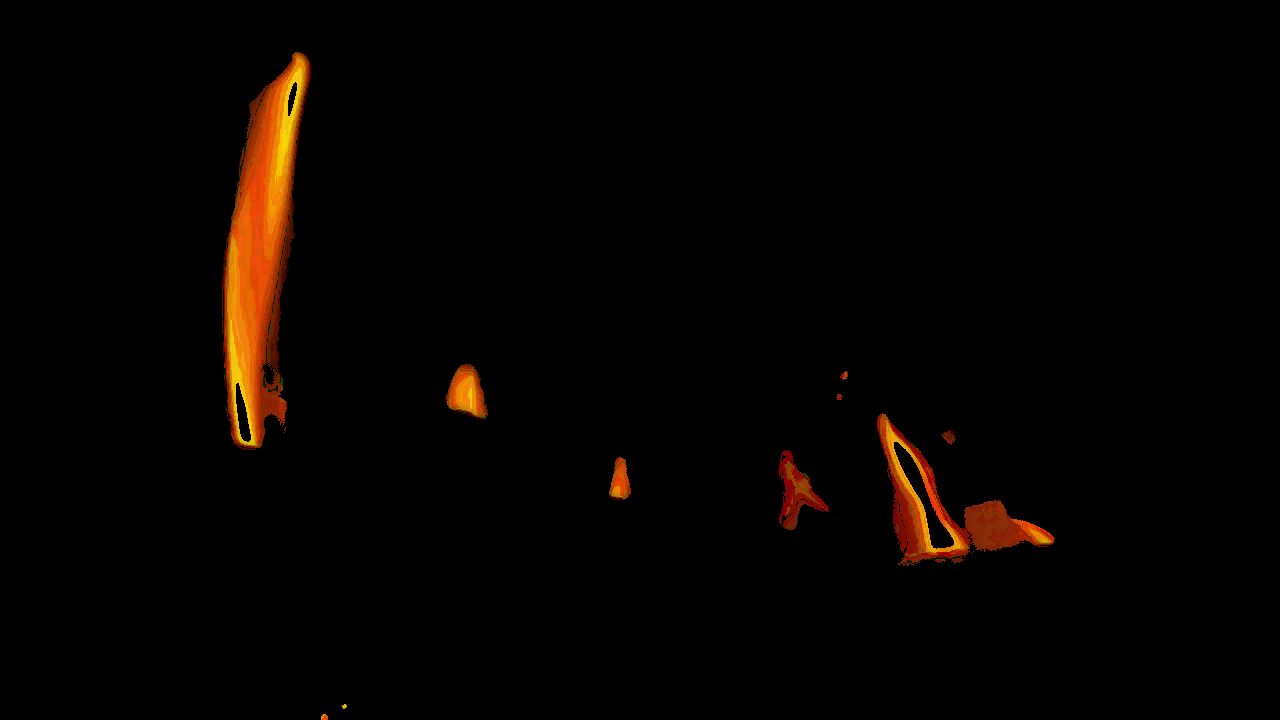

In [0]:
video_file = "/content/drive/My Drive/FireDetection/datasets/Fire_CU.mp4"
video = cv2.VideoCapture(video_file)

(grabbed, frame) = video.read()
blur = cv2.GaussianBlur(frame, (21, 21), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

lower = [8, 50, 50]
upper = [25, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
mask = cv2.inRange(hsv, lower, upper)

output = cv2.bitwise_and(frame, hsv, mask=mask)
cv2_imshow(output)

cv2.destroyAllWindows()
video.release()

https://www.kaggle.com/csjcsj7477/firedetectionmodelkeras-for-video/downloads/nofire_400240.mp4/notebook

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
tot_video_cnt = 0
width = 400
height = 240

ds_x = []
ds_y = [] 

ts_x = []
ts_y = [] 

class wildfire:

    #num_pt : 1 => fire, 0 => no_fire
    #cnt : frame cut count
    #FileName : Video file name 
    def generate_dataset(main,frCnt,num_pt,capture_cnt,FileName):
        
        cap_cnt = 0
        frame_cnt = 0 
        cap = cv2.VideoCapture(FileName)
        mog = cv2.createBackgroundSubtractorMOG2()
        
        while True:
        
            if cap_cnt == capture_cnt:
                break
            print("filename:{}, cnt:{}".format(FileName,cap_cnt+1)) 
            
            frame_cnt += 1 
            
            if (frame_cnt%frCnt) == 0:             
            
                ret, frame = cap.read()
                if ret == False:
                    break

                dst = cv2.fastNlMeansDenoisingColored(frame,None,25,25,7,21)    
                fgmask = mog.apply(dst)
                ds_x.append(fgmask)
                ds_y.append(num_pt)

                cap_cnt += 1

        cap.release()      

    #num_pt : 1 => fire, 0 => no_fire
    #cnt : frame cut count
    #FileName : Video file name 
    def test_dataset(main,frCnt,num_pt,capture_cnt,FileName):
        
        cap_cnt = 0
        frame_cnt = 0 
        cap = cv2.VideoCapture(FileName)
        mog = cv2.createBackgroundSubtractorMOG2()
        
        while True:
        
            if cap_cnt == capture_cnt:
                break
            print("filename:{}, cnt:{}".format(FileName,cap_cnt+1)) 
            
            frame_cnt += 1 
            
            if (frame_cnt%frCnt) == 0:             
            
                ret, frame = cap.read()
                if ret == False:
                    break

                dst = cv2.fastNlMeansDenoisingColored(frame,None,25,25,7,21)    
                fgmask = mog.apply(dst)
                ts_x.append(fgmask)
                ts_y.append(num_pt)

                cap_cnt += 1

        cap.release()

In [0]:
wf = wildfire()
video_cnt = 10
wf.generate_dataset(1,20,video_cnt,'/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4')
tot_video_cnt += video_cnt

filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:1
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:2
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:3
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:4
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:5
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:6
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:7
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:8
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:9
filename:/content/drive/My Drive/FireDetection/datasets/dalma_400240.mp4, cnt:10


In [0]:
video_cnt = 30
wf.generate_dataset(1,80,video_cnt,'/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4')
tot_video_cnt += video_cnt

filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:1
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:2
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:3
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:4
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:5
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:6
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:7
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:8
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:9
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:10
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:11
filename:/content/drive/My Drive/FireDetection/datasets/gwanak_400240.mp4, cnt:12
filename:/content/drive/M

In [0]:
X_train = np.array(ds_x).reshape(tot_video_cnt,width,height,1)
y_train = np.array(ds_y).reshape(tot_video_cnt, 1)
X_train.shape

(80, 400, 240, 1)

In [0]:
X_val = np.array(ds_x).reshape(tot_video_cnt,width,height,1)
y_val = np.array(ds_y).reshape(tot_video_cnt, 1)

In [0]:
video_cnt1 = 10
wf.test_dataset(1,20,video_cnt1,'/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4')

filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:1
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:2
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:3
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:4
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:5
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:6
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:7
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:8
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:9
filename:/content/drive/My Drive/FireDetection/datasets/nofire_400240.mp4, cnt:10


In [0]:
X_test = np.array(ts_x).reshape(video_cnt1,width,height,1)
y_test = np.array(ts_y).reshape(video_cnt1, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0822 06:12:51.825618 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 06:12:51.882498 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 06:12:51.891559 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 06:12:51.953636 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 06:12:51.958594 1401279

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0822 06:13:18.428315 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 06:13:18.464483 140127939630976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 06:13:18.473686 140127939630976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
80/80 [==============================] - 13s 167ms/step - loss: -126.2807 - acc: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 10s 122ms/step - loss: -769.5731 - acc: 0.0000e+00
Epoch 3/20
80/80 [==============================] - 10s 122ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 4/20
80/80 [==============================] - 10s 122ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 5/20
80/80 [==============================] - 10s 122ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 6/20
80/80 [==============================] - 10s 121ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 7/20
80/80 [==============================] - 10s 122ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 8/20
80/80 [==============================] - 10s 122ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 9/20
80/80 [==============================] - 10s 123ms/step - loss: -1020.3126 - acc: 0.0000e+00
Epoch 10/20
80/80 [==============================] - 10s 121ms/ste

In [0]:
score = model.evaluate(X_test, y_test, batch_size=32)
print(score)

10/10 [==============================] - 0s 35ms/step
[-302.9053039550781, 0.0]


https://github.com/pranav1601/Fire-Detection-Using-Deep-Learning-and-OpenCV/blob/master/slow.wav

https://github.com/aronifanger/fire_detection